# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

** Description about the Dataset** (*Source - Kaggle*)

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 

Objective with the dataset is to predict the class lable having value either 1 (i.e., *the patient survived 5 years or longer*) or 2 (*i.e., the patient died within 5 year*), for the set of features excluding class lable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

haberman = pd.read_csv('haberman.csv')
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# The number of data-points and features:
# Data completeness and data-types
print('Shape:',haberman.shape)
print(haberman.info())

Shape: (306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


**View(s):**
1. Dataset comprises of 306 observations and 4 characteristics.
2. Each column has 306 non-null values, Hence, data is complete.

In [4]:
# Need to find out the percentage of data points for each class
haberman['status'].value_counts(normalize =True)

1    0.735294
2    0.264706
Name: status, dtype: float64

**View(s):**

We can see approx. 73% data-points have class value 1 and rest are 2. Hence, we can say the data is ***imbalanced***

<h3>Univariate Analysis</h3>

In order to understand the **features** and **patterns** within the dataset, we shall start with *Univariate* analysis.
As the name goes, in this type of analysis we shall pick one variable at a time to understand it's relation with status lable.

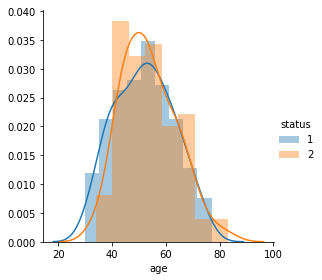

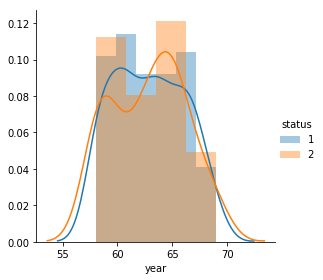

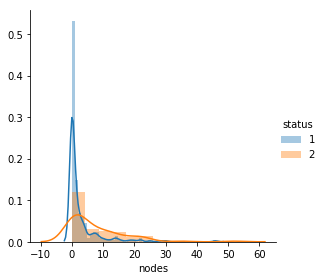

In [5]:
# We will start by observing Histogram and PDF w.r.t individual variable/ columns

for i in range(0,len(list(haberman.columns))):
    if list(haberman.columns)[i] != 'status':
        sns.FacetGrid(haberman, hue='status', height = 4) \
            .map(sns.distplot, list(haberman.columns)[i]) \
            .add_legend()
plt.show()

**View(s):**

We cannot determine any distinct feature for any given characteristic. For *'age'* and *'year'* the PDF or the spread of status is almost overlapping. Mostly indistinguishable.

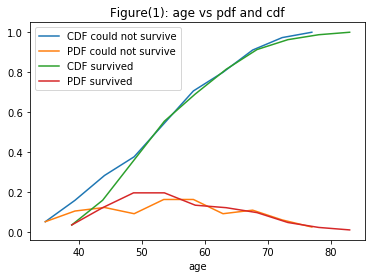

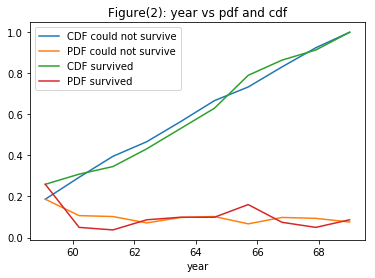

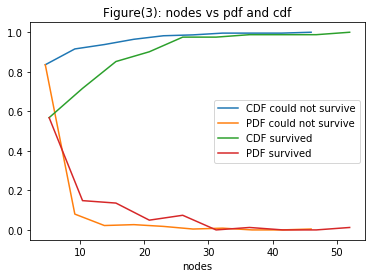

In [6]:
# Let's calculate and visualize PDF and CDF for each variable

haberman_negative = haberman[haberman['status']==1]
haberman_positive = haberman[haberman['status']==2]

for id, name in enumerate(list(haberman.columns)[:3]):
    
    count, bin_edge = np.histogram(haberman_negative[name],density=True, bins= 10)
    pdf = count/sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edge[1:], cdf)
    plt.plot(bin_edge[1:], pdf)
    
    count, bin_edge = np.histogram(haberman_positive[name], density=True, bins= 10)
    pdf = count/sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edge[1:], cdf)
    plt.plot(bin_edge[1:], pdf)
    
    plt.xlabel(name)
    plt.title('Figure({}): '.format(id+1)+name+' vs pdf and cdf')    
    plt.legend(['CDF could not survive','PDF could not survive','CDF survived','PDF survived'])
    plt.show()



**View(s):**

1. From figure (1), we cannot determine much information as the data points are overlapping.

2. From figure (2), as we cannot determine much about the data.

3. From figure (3), we can observe 1%-3% of people who could not survive more than five years have positive_auxiliary_nodes count of 13-27, whereas within the same range of positive_auxiliary_nodes count those people who could survive have very dynamic count of percentage ranging from 7%-17%

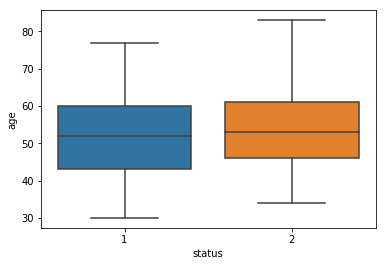

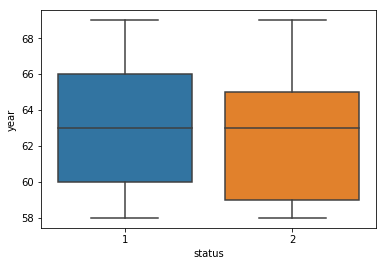

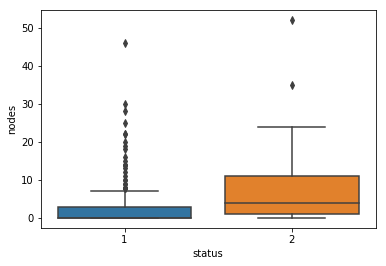

In [7]:
# Box Plot
for id, name in enumerate(list(haberman.columns)[:3]):
    sns.boxplot(x='status',y=name, data=haberman) 
    plt.show()

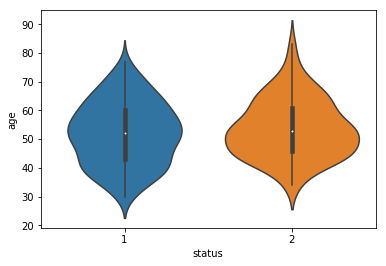

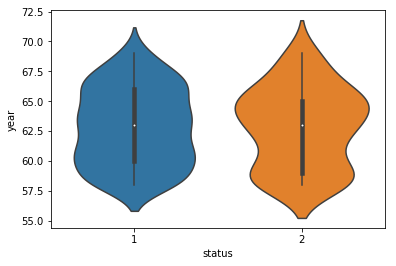

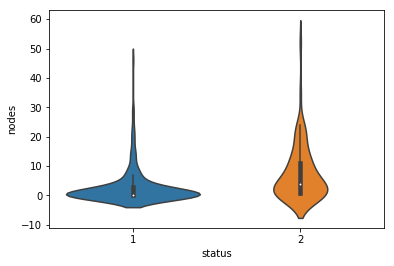

In [8]:
# Violin Plot
for id, name in enumerate(list(haberman.columns)[:3]):
    sns.violinplot(x='status',y=name, data=haberman)
    plt.show()

**View(s):**

1. A vital point to reiterate that, the data points are highly imbalanced which is loss of insight in making decision.

2. Out of 3 feature sets positive_auxiliary_nodes seems to be most distnict and distributed feature.

3. We can see, the people who survived more than 5 years have a dense distribution of positive_auxiliary_nodes near to 0. In comparison, other class has a much spreaded distribution of positive_auxiliary_nodes.


<h3>Bivariate Analysis</h3>

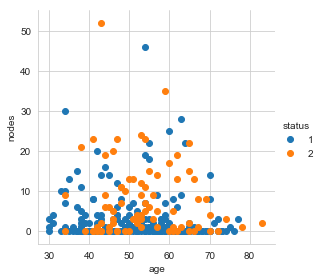

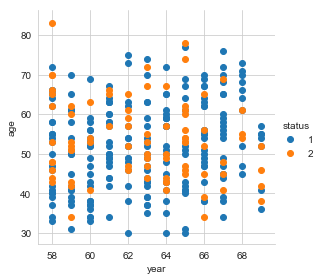

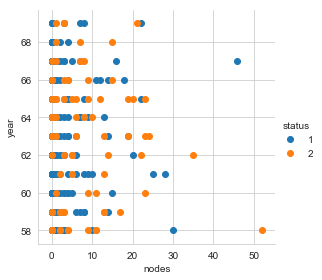

In [9]:
# As we have 3 feature sets, in order to understand the behaviour of lable class in accordance with the features, we shall plot 2-D scatter plot into 3C2 = 3 combinations for further observations

sns.set_style('whitegrid')
l1=['age', 'year', 'nodes']
for i in range(0,len(l1)):
    sns.FacetGrid(haberman, hue = 'status', height =4) \
        .map(plt.scatter, l1[i], l1[i-1]) \
        .add_legend()
    plt.show()

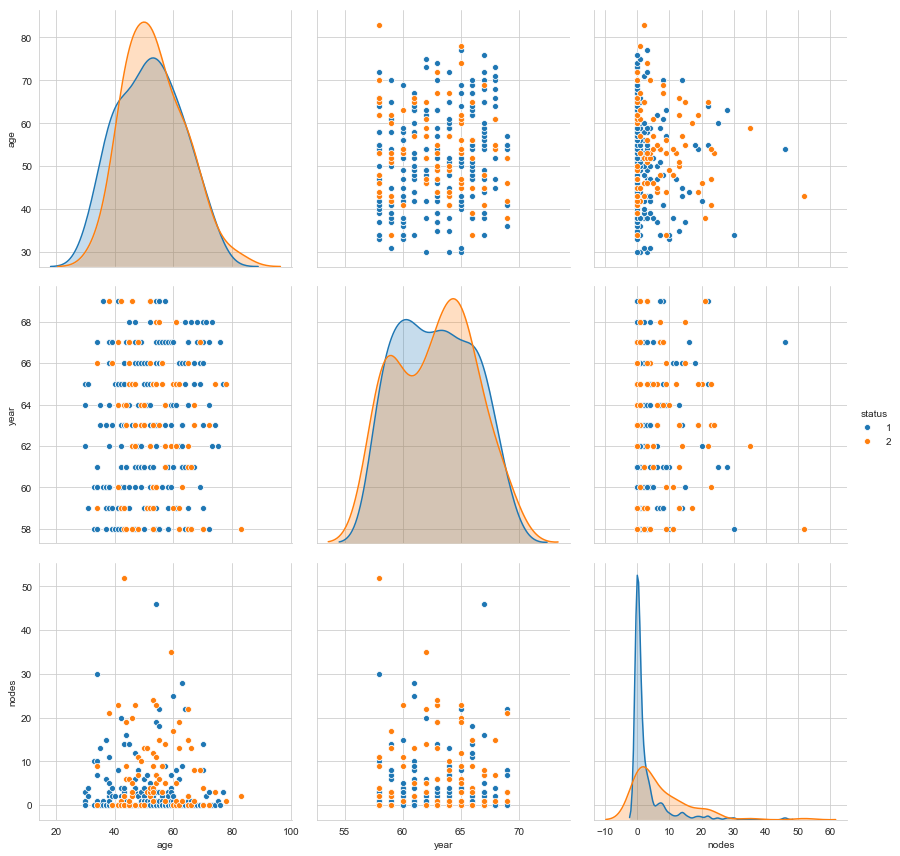

In [10]:
#Pair Plot

sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", diag_kind = "kde", height=4,  vars = ['age', 'year', 'nodes']);
plt.show()

**View(s):**

<li>In the above figures we have 2-D scattered plot of *age vs nodes*, *year vs age*, *nodes vs year*. However, we see in most of the figures the characteristics are overlapping each other does not provide us with any clue. <li> Yet, amongst all the combincations of featutres there is no evident separation between two variables (classes), However, the scatter-plot nodes Vs year gives us a better separator than others.

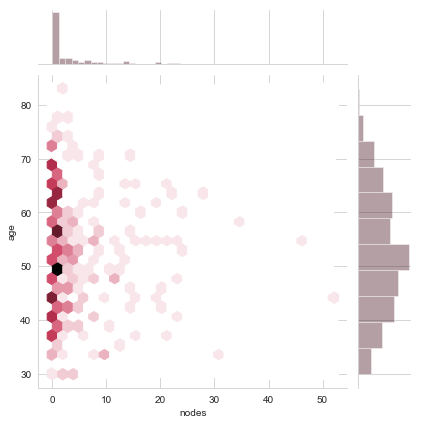

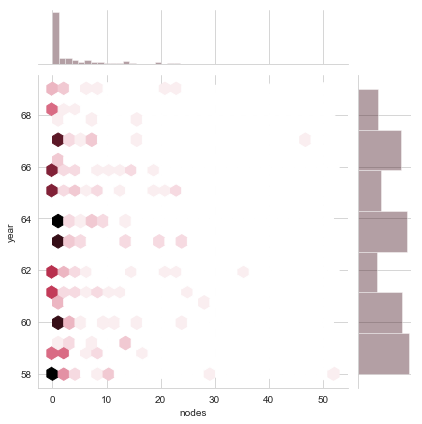

In [23]:
#Hexbin plot

for id, name in enumerate(list(haberman.columns)[:2]):
    sns.jointplot(x='nodes', y= name, data= haberman, kind="hex", color="#42111c")
plt.show()

**View(s):**

<li>In the above figures we have Hexbin plot with marginal distributions of *nodes vs age*, *nodes vs year*, *nodes vs year*. From the first plot we can see the densed age range in the dataset people within 50-55 years old.

**Conclusion**

<li>We have 3 feature sets, amongst which as per our analysis, column <i>nodes</i> seems most significant (maximum weightage). 
<li>As we initially observed that the dataset is imbalanced, so in order to fix such we may require to apply resampling to the dataset to be specific we can use oversampling and undersampling in the target class.
<li>In an ideal situation, it is desired to have dataset with many more line counts, and also being balanced.
<li> In any of the 2D representation we were not been able to linearly segregate the feature sets to understand the behaviour of the classifier. Some domain expertise should help to use feature engineering over this data.
<li>If we try to build a model with this dataset after balancing the dataset we may incur the problem of over-fitting as the record counts are way less.